In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import keras
from keras_unet.models import custom_unet
from sklearn.model_selection import train_test_split

2023-04-04 01:24:55.487497: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/ESUS/'
images_file = os.path.join(DATAPATH, 'images.npy')
labels_file = os.path.join(DATAPATH, 'labels_new.npy')

In [4]:
images = np.load(images_file)
labels = np.load(labels_file)

In [5]:
# full dataset does not have the last channel
images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
labels = labels.reshape(labels.shape[0],labels.shape[1],labels.shape[2],1)

In [6]:
images = images.astype(np.float64)
labels = labels.astype(np.float64)

In [7]:
for i in range(images.shape[0]):
    
    images[i] = (images[i] - images[i].min()) / (images[i].max() - images[i].min()) # normalize individually
    

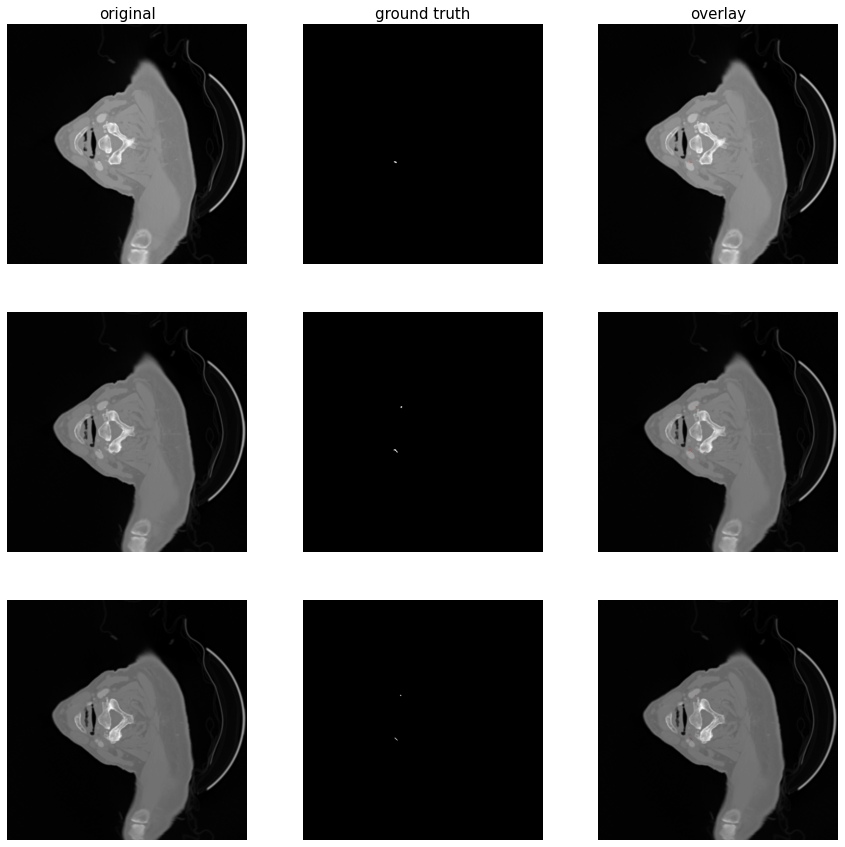

In [8]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=images, mask_imgs=labels, nm_img_to_plot=3, figsize=5)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=0)

In [11]:
from keras_unet_collection import models, losses
import torch

model = models.swin_unet_2d((512, 512, 1), filter_num_begin=64,
                               n_labels=1, depth=4, stack_num_down=4, stack_num_up=4,
                               patch_size=(4, 4), num_heads=[4, 8, 16, 16],
                               window_size=[4, 2, 2, 2], num_mlp=512, 
                               output_activation='Sigmoid', shift_window=True, name='swin_unet')

#Softmax

2023-04-04 01:24:59.850914: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-04 01:25:00.069975: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-04 01:25:00.073178: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-04 01:25:00.073198: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-04 01:25:00.073239: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-04 

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2023-04-04 01:25:00.089936: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 01:25:00.395096: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-04 01:25:00.399426: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-04 01:25:00.415091: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible 

In [12]:
from tensorflow.keras import optimizers
from keras_unet.metrics import iou, iou_thresholded, dice_coef
from keras_unet_collection import losses

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr = 0.001),
              metrics=[iou, iou_thresholded])

/home/jiehyun.kim001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=16,
                    epochs=200,
                    validation_data=(X_val, y_val))

2023-04-04 01:25:05.422734: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-04 01:25:05.441177: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/200


2023-04-04 01:25:30.189872: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-04 01:25:31.081234: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-04-04 01:25:31.081603: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-04 01:25:31.237980: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-04 01:25:31.397220: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8500
2023-04-04 01:25:31.909177: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-04 01:25:31.909204: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-04 01:25:31.90927

39/39 [==============================] - 61s 860ms/step - loss: 0.0713 - iou: 0.0011 - iou_thresholded: 0.0013 - val_loss: 0.0057 - val_iou: 6.7609e-04 - val_iou_thresholded: 0.0013
Epoch 2/200
39/39 [==============================] - 29s 737ms/step - loss: 0.0035 - iou: 9.2796e-04 - iou_thresholded: 0.0016 - val_loss: 0.0029 - val_iou: 0.0011 - val_iou_thresholded: 0.0013
Epoch 3/200
39/39 [==============================] - 28s 729ms/step - loss: 0.0037 - iou: 0.0011 - iou_thresholded: 0.0014 - val_loss: 0.0053 - val_iou: 0.0011 - val_iou_thresholded: 0.0013
Epoch 4/200
39/39 [==============================] - 29s 733ms/step - loss: 0.0029 - iou: 0.0011 - iou_thresholded: 0.0017 - val_loss: 0.0021 - val_iou: 0.0011 - val_iou_thresholded: 0.0013
Epoch 5/200
39/39 [==============================] - 28s 730ms/step - loss: 0.0020 - iou: 0.0012 - iou_thresholded: 0.0015 - val_loss: 0.0019 - val_iou: 0.0012 - val_iou_thresholded: 0.0013
Epoch 6/200
39/39 [==============================] - 2

Epoch 43/200
39/39 [==============================] - 29s 735ms/step - loss: 2.1160e-04 - iou: 0.4823 - iou_thresholded: 0.5968 - val_loss: 4.2422e-04 - val_iou: 0.3683 - val_iou_thresholded: 0.4252
Epoch 44/200
39/39 [==============================] - 29s 734ms/step - loss: 1.9015e-04 - iou: 0.5093 - iou_thresholded: 0.6286 - val_loss: 4.3046e-04 - val_iou: 0.3693 - val_iou_thresholded: 0.4178
Epoch 45/200
39/39 [==============================] - 29s 734ms/step - loss: 1.8105e-04 - iou: 0.5208 - iou_thresholded: 0.6426 - val_loss: 4.3150e-04 - val_iou: 0.3782 - val_iou_thresholded: 0.4261
Epoch 46/200
39/39 [==============================] - 28s 728ms/step - loss: 1.7078e-04 - iou: 0.5421 - iou_thresholded: 0.6664 - val_loss: 4.1965e-04 - val_iou: 0.3860 - val_iou_thresholded: 0.4364
Epoch 47/200
39/39 [==============================] - 29s 734ms/step - loss: 1.7692e-04 - iou: 0.5397 - iou_thresholded: 0.6590 - val_loss: 4.4220e-04 - val_iou: 0.3830 - val_iou_thresholded: 0.4243
Epoch

39/39 [==============================] - 29s 735ms/step - loss: 5.2930e-05 - iou: 0.8175 - iou_thresholded: 0.9069 - val_loss: 5.7011e-04 - val_iou: 0.4615 - val_iou_thresholded: 0.4791
Epoch 85/200
39/39 [==============================] - 29s 736ms/step - loss: 4.9150e-05 - iou: 0.8249 - iou_thresholded: 0.9125 - val_loss: 5.4894e-04 - val_iou: 0.4735 - val_iou_thresholded: 0.4917
Epoch 86/200
39/39 [==============================] - 28s 726ms/step - loss: 4.9516e-05 - iou: 0.8222 - iou_thresholded: 0.9113 - val_loss: 5.8037e-04 - val_iou: 0.4619 - val_iou_thresholded: 0.4808
Epoch 87/200
39/39 [==============================] - 28s 729ms/step - loss: 4.7025e-05 - iou: 0.8306 - iou_thresholded: 0.9151 - val_loss: 5.7545e-04 - val_iou: 0.4709 - val_iou_thresholded: 0.4878
Epoch 88/200
39/39 [==============================] - 29s 733ms/step - loss: 4.3436e-05 - iou: 0.8430 - iou_thresholded: 0.9303 - val_loss: 5.6826e-04 - val_iou: 0.4751 - val_iou_thresholded: 0.4936
Epoch 89/200
39/39

39/39 [==============================] - 28s 729ms/step - loss: 1.2483e-05 - iou: 0.9463 - iou_thresholded: 0.9897 - val_loss: 7.5765e-04 - val_iou: 0.4735 - val_iou_thresholded: 0.4814
Epoch 126/200
39/39 [==============================] - 28s 731ms/step - loss: 1.2161e-05 - iou: 0.9466 - iou_thresholded: 0.9886 - val_loss: 7.7346e-04 - val_iou: 0.4695 - val_iou_thresholded: 0.4794
Epoch 127/200
39/39 [==============================] - 28s 731ms/step - loss: 1.3239e-05 - iou: 0.9459 - iou_thresholded: 0.9864 - val_loss: 7.7581e-04 - val_iou: 0.4753 - val_iou_thresholded: 0.4830
Epoch 128/200
39/39 [==============================] - 29s 736ms/step - loss: 1.2346e-05 - iou: 0.9488 - iou_thresholded: 0.9882 - val_loss: 7.7917e-04 - val_iou: 0.4741 - val_iou_thresholded: 0.4818
Epoch 129/200
39/39 [==============================] - 28s 730ms/step - loss: 1.1565e-05 - iou: 0.9509 - iou_thresholded: 0.9889 - val_loss: 7.8992e-04 - val_iou: 0.4751 - val_iou_thresholded: 0.4835
Epoch 130/200


39/39 [==============================] - 29s 732ms/step - loss: 6.2510e-06 - iou: 0.9781 - iou_thresholded: 0.9942 - val_loss: 9.2378e-04 - val_iou: 0.4759 - val_iou_thresholded: 0.4804
Epoch 167/200
39/39 [==============================] - 28s 728ms/step - loss: 7.2693e-06 - iou: 0.9735 - iou_thresholded: 0.9919 - val_loss: 9.0952e-04 - val_iou: 0.4840 - val_iou_thresholded: 0.4896
Epoch 168/200
39/39 [==============================] - 29s 737ms/step - loss: 1.0724e-05 - iou: 0.9647 - iou_thresholded: 0.9853 - val_loss: 9.1642e-04 - val_iou: 0.4783 - val_iou_thresholded: 0.4838
Epoch 169/200
39/39 [==============================] - 29s 733ms/step - loss: 1.9268e-05 - iou: 0.9447 - iou_thresholded: 0.9712 - val_loss: 9.0050e-04 - val_iou: 0.4755 - val_iou_thresholded: 0.4811
Epoch 170/200
39/39 [==============================] - 28s 727ms/step - loss: 4.6661e-05 - iou: 0.8929 - iou_thresholded: 0.9219 - val_loss: 9.2978e-04 - val_iou: 0.4574 - val_iou_thresholded: 0.4641
Epoch 171/200


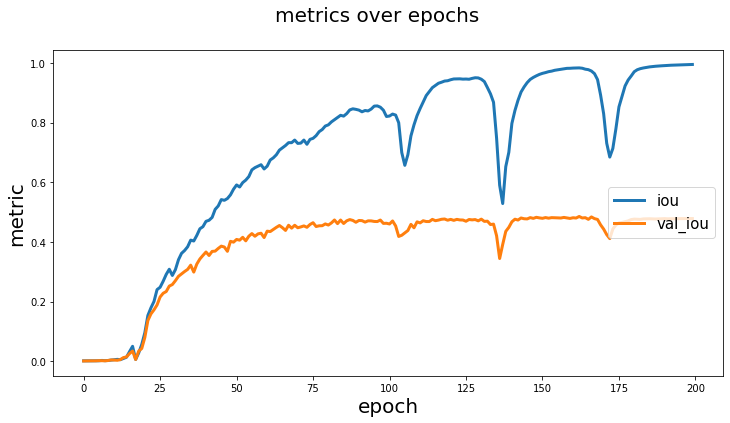

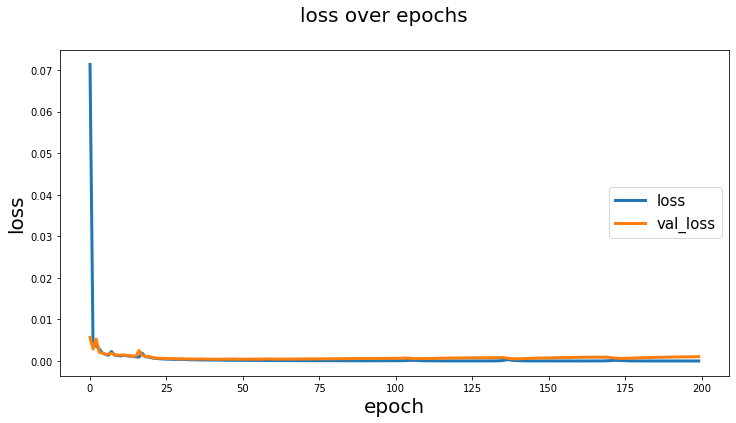

In [15]:
from keras_unet.utils import plot_segm_history

plot_segm_history(history)

In [16]:
y_pred = model.predict(X_val)

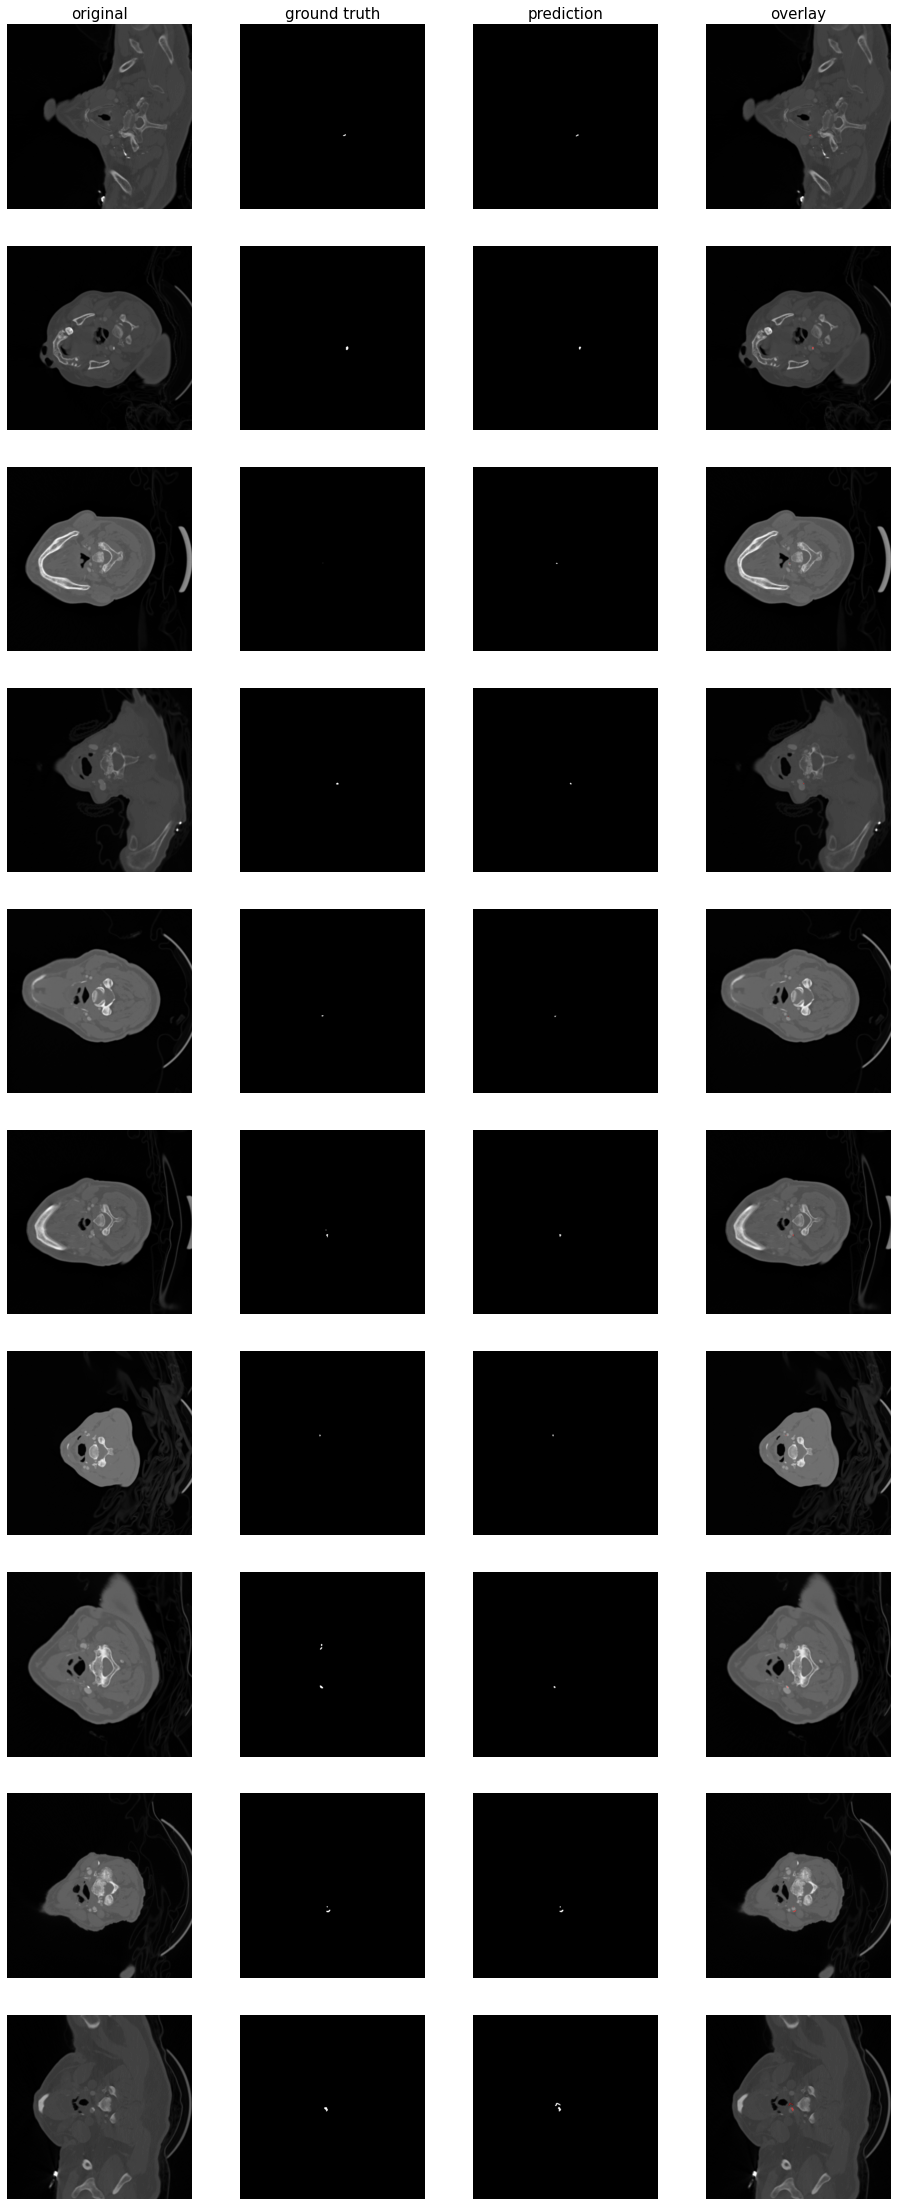

In [17]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=10)

In [18]:
loss, iou, iou_thresholded = model.evaluate(X_val, y_val)

5/5 [==============================] - 2s 421ms/step - loss: 0.0010 - iou: 0.4893 - iou_thresholded: 0.4925
